In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

## Overview of the data

In [207]:
df = pd.read_csv("/Users/fredpeng/Desktop/weatherAUS.csv")

In [208]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


### contains 145460 objects and 23 features:

In [209]:
df.shape

(145460, 23)

### Many missing values:

In [210]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

### The target data is imbalanced-nearly 76% indicate "No"

percentage of No in "RainTomorrow(target variable)"= 75.83940602227418%
percentage of Yes in "RainTomorrow(target variable)"= 24.16059397772583%


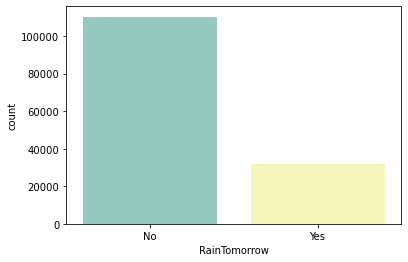

In [211]:
ax=sns.countplot(x = df.RainTomorrow ,palette="Set3")
count=0
for i in df.RainTomorrow:
    if i=="No":
        count=count+1
per_of_0=count/145460
per_of_1=1-per_of_0
print('percentage of No in "RainTomorrow(target variable)"= '+ str(per_of_0*100)+'%')
print('percentage of Yes in "RainTomorrow(target variable)"= '+ str(per_of_1*100)+'%')

### Since we have enough data, and there are too much missing value, imputation will be relatively meaningless and extremely complicated,and  we simply drop all the rows that contains missing value. 

### PS. As I tried, even if we do the imputation there will be no improvement or only tiny improvement on the result.

In [212]:
df_dropallNA=df.dropna()

### After dropping all NA, we still have 56420 objects:

In [213]:
df_dropallNA.shape

(56420, 23)

### Now nearly 78% of the target indicate "No"

percentage of No in "RainTomorrow(target variable)"= 77.974122651542%
percentage of Yes in "RainTomorrow(target variable)"= 22.02587734845799%


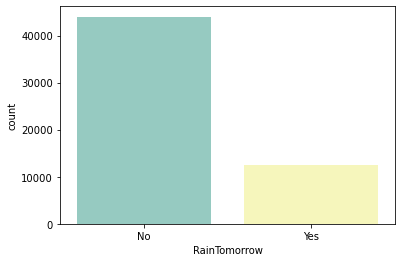

In [214]:
ax=sns.countplot(x = df_dropallNA.RainTomorrow ,palette="Set3")
count=0
for i in df_dropallNA.RainTomorrow:
    if i=="No":
        count=count+1
per_of_0=count/df_dropallNA.shape[0]
per_of_1=1-per_of_0
print('percentage of No in "RainTomorrow(target variable)"= '+ str(per_of_0*100)+'%')
print('percentage of Yes in "RainTomorrow(target variable)"= '+ str(per_of_1*100)+'%')

### The feature "Date" should be meaningless and we drop it

In [215]:
#drop the date colunm
df=df_dropallNA.drop(['Date'],axis=1)

In [216]:
numer = df._get_numeric_data().columns

### Transform "No" to 0 and "Yes" to 1 for the target variable

In [217]:

df.RainToday=df.RainToday.map(dict(Yes=1, No=0))

In [218]:
df.RainTomorrow=df.RainTomorrow.map(dict(Yes=1, No=0))

### Outlier detection for numerical variable

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


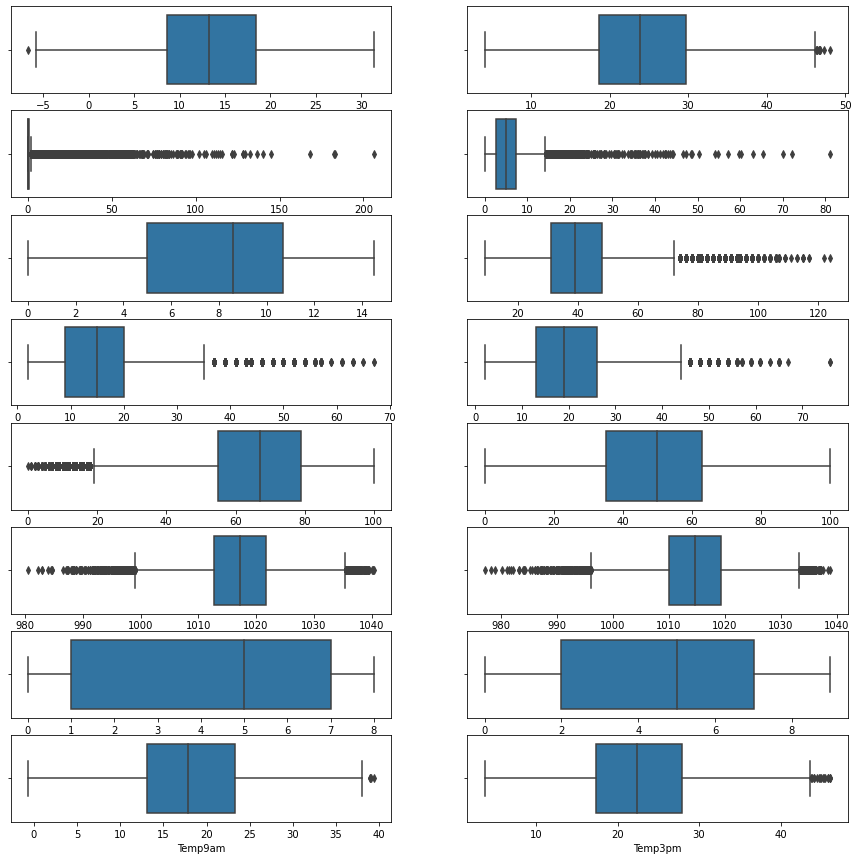

In [219]:
rows = 8
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
print(numer)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numer[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

### Remove outliers in numerical variable

In [220]:

def remov_out(numer):
    for i in range(len(numer)):
        q1 = df[numer[i]].quantile(0.25)
        q3 = df[numer[i]].quantile(0.75)
        IQR = q3-q1
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        df.loc[(df[numerical[i]] <= lower), numer[i]] = lower
        df.loc[(df[numerical[i]] >= upper), numer[i]] = upper
remov_out(numer)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')


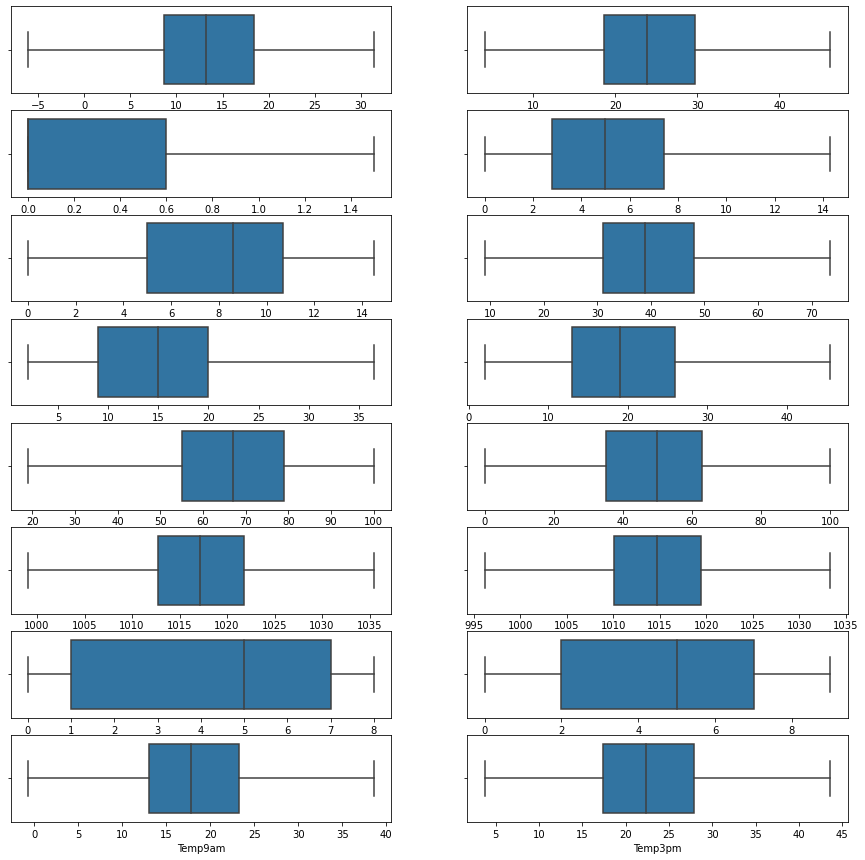

In [221]:
rows = 8
cols = 2
fig, ax = plt.subplots(rows, cols, figsize=(15,15))
print(numer)
i=0;j=0;k=0;
while i<num_of_rows:
    while j<num_of_cols:
        sns.boxplot(df[numer[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

### One hot encoding for categorical variables:

In [222]:

df_WindGustDir = pd.get_dummies(df["WindGustDir"], prefix="WGD")
df_WindDir9am = pd.get_dummies(df["WindDir9am"], prefix="WD9")
df_WindDir3pm = pd.get_dummies(df["WindDir3pm"], prefix="WD3")
df_RainToday = pd.get_dummies(df["RainToday"])
df_location = pd.get_dummies(df["Location"])
df_new = pd.concat([df, df_WindGustDir, df_WindDir9am, df_WindDir3pm, df_RainToday, df_location], axis=1)
df_new.drop(columns=["WindGustDir", "WindDir9am", "WindDir3pm", "RainToday", "Location"], axis=1, inplace=True)

In [223]:
df_new

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,PerthAirport,Portland,Sale,Sydney,SydneyAirport,Townsville,WaggaWagga,Watsonia,Williamtown,Woomera
6049,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,...,0,0,0,0,0,0,0,0,0,0
6050,18.4,28.9,0.0,14.3,13.0,37.0,19.0,19.0,30.0,8.0,...,0,0,0,0,0,0,0,0,0,0
6052,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6053,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,...,0,0,0,0,0,0,0,0,0,0
6054,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142298,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,...,0,0,0,0,0,0,0,0,0,0
142299,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,...,0,0,0,0,0,0,0,0,0,0
142300,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,...,0,0,0,0,0,0,0,0,0,0
142301,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,...,0,0,0,0,0,0,0,0,0,0


### Train-Test split, (8:2)

In [224]:
#Splitting (train vs test)
from sklearn.model_selection import train_test_split, GridSearchCV
train_set, test_set = train_test_split(df_new, test_size=0.2,random_state=30)

In [225]:
x_Train=train_set.drop(['RainTomorrow'],axis=1)
y_Train=train_set.RainTomorrow
x_Test=test_set.drop(['RainTomorrow'],axis=1)
y_Test=test_set.RainTomorrow

### Scale the training data in order to do PCA

In [226]:
scaler=StandardScaler()
#fitting standardization on train data only
scaler.fit(x_Train)
x_Train_std = scaler.transform(x_Train)
#X_Test_std = StandardScaler().transform(x_Test)


In [227]:
x_Train_std

array([[ 0.70865628,  0.830651  , -0.6310177 , ..., -0.22407975,
        -0.14827588, -0.17692608],
       [-1.05119531, -0.43141973, -0.30303019, ..., -0.22407975,
        -0.14827588, -0.17692608],
       [-1.92333415, -1.50704819, -0.6310177 , ..., -0.22407975,
        -0.14827588, -0.17692608],
       ...,
       [-0.49053462, -0.02985177, -0.6310177 , ..., -0.22407975,
        -0.14827588, -0.17692608],
       [ 0.63078674,  0.09922364, -0.30303019, ..., -0.22407975,
        -0.14827588, -0.17692608],
       [-0.4438129 ,  0.32869105, -0.6310177 , ..., -0.22407975,
        -0.14827588, -0.17692608]])

### PCA ( show the first 30 PCs)

In [230]:
pca = PCA(n_components=30)
pca.fit(x_Train_std)
XtrainPCA = pca.transform(x_Train_std)
#XtestPCA = pca.transform(XtestSTD)
XtrainPCA.shape

(45136, 30)

### PVE vs PC, we see that basically all PCs have very low PVE, and therefore depend on PCA we should consider all of the features . In this case, PCA does not really help us to do feature reduction, and we need to perform feature selection to reduce the dimension of the data (after one hot encoding, we now have 93 features).

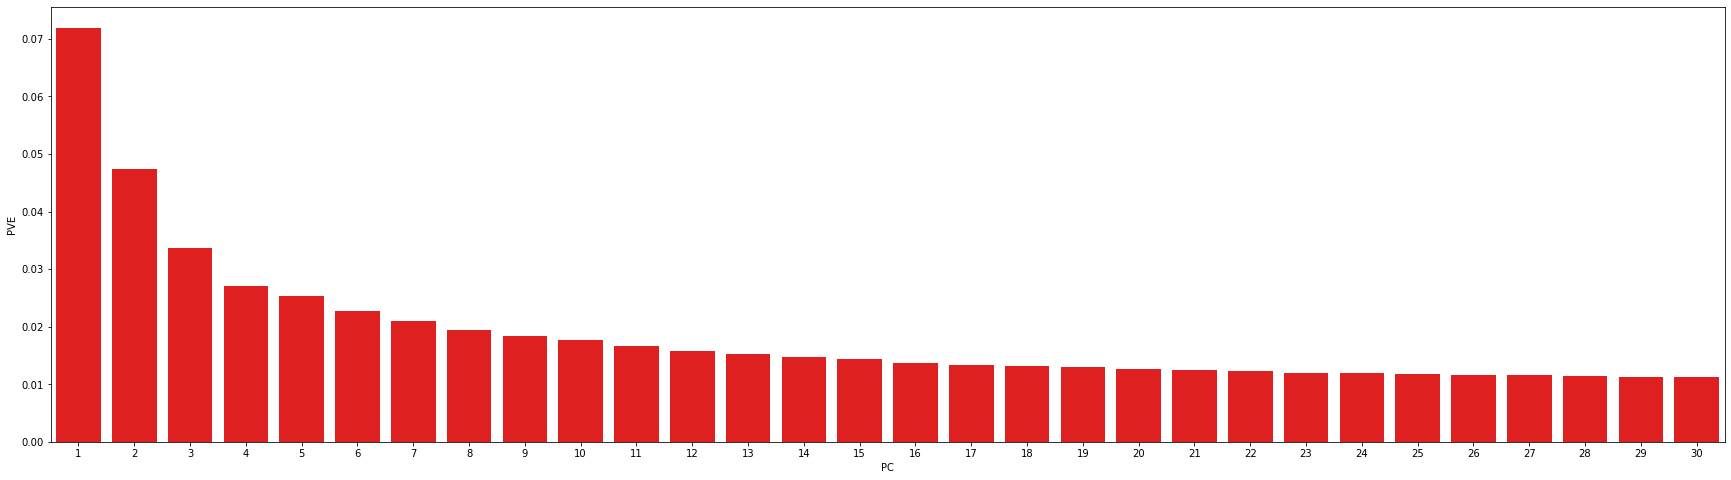

In [243]:
PC = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]
pca_df = pd.DataFrame({'PVE':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,8))
sns.barplot(x='PC',y="PVE", data=pca_df, color="r");

### Feature selection using Random Forest

In [247]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_Train,y_Train)
rf_pred=rf.predict(x_Test)


NameError: name 'accuracy_score' is not defined

In [250]:
rf_acc = accuracy_score(y_Test, rf_pred)
print("Accuracy:",rf_acc)

Accuracy: 0.8616625310173698


In [251]:
importance = rf.feature_importances_
importance

array([0.03833292, 0.03689988, 0.0270005 , 0.03302504, 0.09474465,
       0.04750189, 0.02693381, 0.02839594, 0.04319099, 0.12678045,
       0.0515754 , 0.05903734, 0.0274359 , 0.05539418, 0.03633993,
       0.04055558, 0.002398  , 0.00232669, 0.00217399, 0.00361032,
       0.0024089 , 0.00247183, 0.00293522, 0.00307927, 0.00298465,
       0.00280039, 0.00256416, 0.00302296, 0.00295189, 0.0033837 ,
       0.00324192, 0.00276418, 0.00236469, 0.00266607, 0.00195989,
       0.00458861, 0.00320551, 0.00368464, 0.00296468, 0.0028681 ,
       0.00256544, 0.00229689, 0.0025551 , 0.00256007, 0.00267955,
       0.0033668 , 0.0028042 , 0.00272913, 0.0024018 , 0.00249242,
       0.00248556, 0.00348879, 0.00269496, 0.00308071, 0.0029013 ,
       0.00311839, 0.00304482, 0.00273617, 0.00247635, 0.00260284,
       0.00241794, 0.00304687, 0.00371084, 0.00272121, 0.01654556,
       0.02000037, 0.00111521, 0.00228206, 0.00215775, 0.00144943,
       0.00053169, 0.00221466, 0.00152134, 0.00191357, 0.00203

### Feature name vs. Feature importance

In [253]:
col_importance = {}
for i in range(len(df_new.columns) - 2):
    for j in range(len(importance)):
        col_importance[df_new.columns[i]] = importance[i]
        break
col_importance

{'MinTemp': 0.03833291793459076,
 'MaxTemp': 0.03689988432486621,
 'Rainfall': 0.0270005034646154,
 'Evaporation': 0.033025039977856316,
 'Sunshine': 0.09474464718317348,
 'WindGustSpeed': 0.04750188950811559,
 'WindSpeed9am': 0.026933810644341943,
 'WindSpeed3pm': 0.028395943312060603,
 'Humidity9am': 0.04319098711915674,
 'Humidity3pm': 0.12678045108445857,
 'Pressure9am': 0.051575400236297454,
 'Pressure3pm': 0.05903733554088783,
 'Cloud9am': 0.02743589522050547,
 'Cloud3pm': 0.055394178646367316,
 'Temp9am': 0.03633992855443758,
 'Temp3pm': 0.040555576923445885,
 'RainTomorrow': 0.0023980043364615206,
 'WGD_E': 0.002326689243609066,
 'WGD_ENE': 0.0021739869727795125,
 'WGD_ESE': 0.003610315569012935,
 'WGD_N': 0.0024089048625394387,
 'WGD_NE': 0.0024718306561127977,
 'WGD_NNE': 0.002935217201523155,
 'WGD_NNW': 0.0030792685207535276,
 'WGD_NW': 0.0029846542819423356,
 'WGD_S': 0.002800385509720589,
 'WGD_SE': 0.0025641558519369817,
 'WGD_SSE': 0.003022964242547731,
 'WGD_SSW': 0.00

### Sort the features based on feature importance (large to small)

In [254]:
sorted_col_importance = {}
##do it in reverse to the most important featrue are first
sorted_keys = reversed(sorted(col_importance, key=col_importance.get))
for i in sorted_keys:
    sorted_col_importance[i] = col_importance[i]
sorted_col_importance


{'Humidity3pm': 0.12678045108445857,
 'Sunshine': 0.09474464718317348,
 'Pressure3pm': 0.05903733554088783,
 'Cloud3pm': 0.055394178646367316,
 'Pressure9am': 0.051575400236297454,
 'WindGustSpeed': 0.04750188950811559,
 'Humidity9am': 0.04319098711915674,
 'Temp3pm': 0.040555576923445885,
 'MinTemp': 0.03833291793459076,
 'MaxTemp': 0.03689988432486621,
 'Temp9am': 0.03633992855443758,
 'Evaporation': 0.033025039977856316,
 'WindSpeed3pm': 0.028395943312060603,
 'Cloud9am': 0.02743589522050547,
 'Rainfall': 0.0270005034646154,
 'WindSpeed9am': 0.026933810644341943,
 0: 0.02000036510917486,
 'WD3_WSW': 0.016545563731346732,
 'WD9_ESE': 0.004588608881597043,
 'WD3_W': 0.003710835432524866,
 'WD9_NE': 0.0036846416935747478,
 'WGD_ESE': 0.003610315569012935,
 'WD3_ESE': 0.0034887861112465413,
 'WGD_SW': 0.00338370195713972,
 'WD9_SW': 0.0033668022805414454,
 'Nuriootpa': 0.0033117098868105854,
 'WGD_W': 0.0032419201418354567,
 'WD9_N': 0.0032055081985016974,
 'WD3_NNW': 0.0031183925147137

In [375]:
#orderedCols = list(sorted_col_importance.keys())
#orderedCols
#numCols = 15
#cols_to_use = []
#for i in range(numCols):
    #cols_to_use.append(orderedCols[i])
#cols_to_use

In [264]:
sorted_col_importance.keys()

dict_keys(['Humidity3pm', 'Sunshine', 'Pressure3pm', 'Cloud3pm', 'Pressure9am', 'WindGustSpeed', 'Humidity9am', 'Temp3pm', 'MinTemp', 'MaxTemp', 'Temp9am', 'Evaporation', 'WindSpeed3pm', 'Cloud9am', 'Rainfall', 'WindSpeed9am', 0, 'WD3_WSW', 'WD9_ESE', 'WD3_W', 'WD9_NE', 'WGD_ESE', 'WD3_ESE', 'WGD_SW', 'WD9_SW', 'Nuriootpa', 'WGD_W', 'WD9_N', 'WD3_NNW', 'PerthAirport', 'WD3_NE', 'WGD_NNW', 'WD3_SW', 'WD3_NW', 'WGD_SSE', 'Perth', 'WGD_NW', 'WD9_NNE', 'WGD_SSW', 'WGD_NNE', 'WD3_NNE', 'WD9_NNW', 'Moree', 'Sydney', 'WD9_W', 'WGD_S', 'WGD_WNW', 'WD3_S', 'MountGambier', 'WD9_WNW', 'WD3_WNW', 'WD3_N', 'WD9_SSW', 'WD9_E', 'WD3_SSE', 'Melbourne', 'WD9_NW', 'WGD_SE', 'WD9_SSE', 'WD9_SE', 'WaggaWagga', 'WD3_E', 'WD3_ENE', 'WD3_SE', 'WGD_NE', 'WD3_SSW', 'WGD_N', 'WD9_WSW', 'RainTomorrow', 'WGD_WSW', 'WGD_E', 'WD9_S', 'Sale', 'AliceSprings', 'Cobar', 'WGD_ENE', 'Brisbane', 'Watsonia', 'Hobart', 'Portland', 'WD9_ENE', 'Darwin', 'Townsville', 'NorfolkIsland', 'MelbourneAirport', 'CoffsHarbour', 'Mildu

In [288]:
x_ax=list(sorted_col_importance.keys())
y_ax=list(sorted_col_importance.values())

### Visulization to show feature vs. feature importance. We can see that after the 18th feature, the feature importance decline sharply. This means we probably should not consider the rest features(19th to the end) when building our model

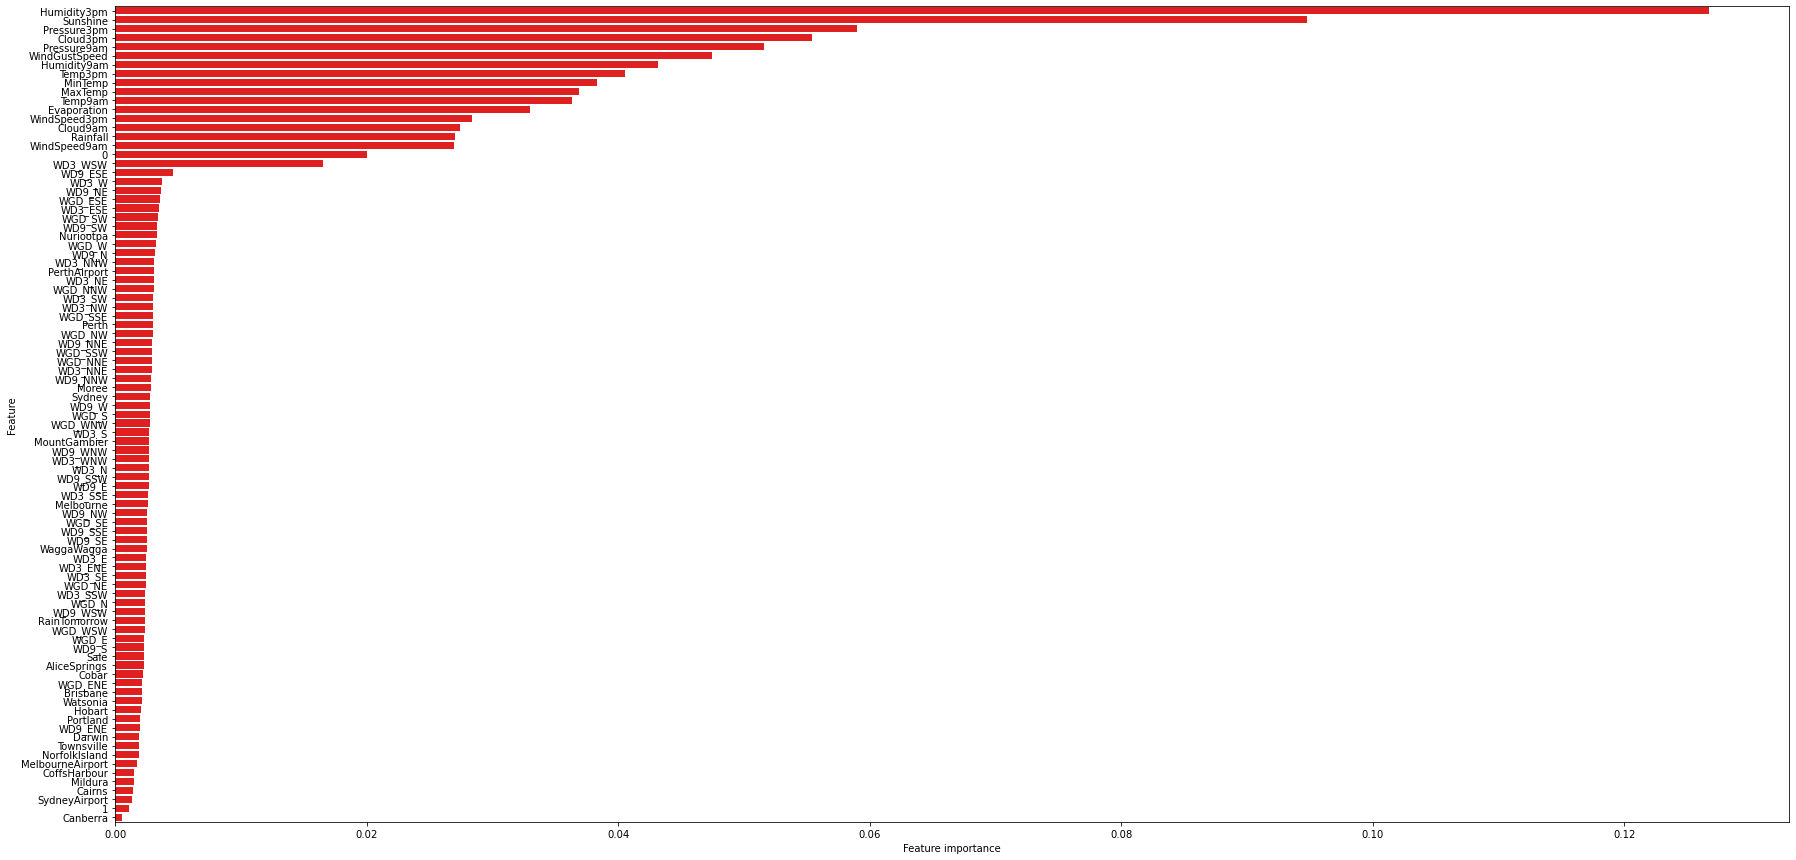

In [298]:

fs_df = pd.DataFrame({'Feature importance':y_ax, 'Feature':x_ax})
plt.figure(figsize=(30,15))
sns.barplot(x='Feature importance',y="Feature", data=fs_df, color="r");

### The name of the first 18 most important features

In [391]:
x_ax[0:18]


['Humidity3pm',
 'Sunshine',
 'Pressure3pm',
 'Cloud3pm',
 'Pressure9am',
 'WindGustSpeed',
 'Humidity9am',
 'Temp3pm',
 'MinTemp',
 'MaxTemp',
 'Temp9am',
 'Evaporation',
 'WindSpeed3pm',
 'Cloud9am',
 'Rainfall',
 'WindSpeed9am',
 0,
 'WD3_WSW']

### Run a for loop to see what is the best features to use among these 18 features

In [395]:
list_fs=[]
for i in range(5,19):
    df_after_fs=df_new.filter(x_ax[0:i])
    df_after_fs["RainTomorrow"]=df_new["RainTomorrow"]
    df_after_fs
    from sklearn.model_selection import train_test_split, GridSearchCV
    train_set1, test_set1 = train_test_split(df_after_fs, test_size=0.2,random_state=30)
    x_Train1=train_set1.drop(['RainTomorrow'],axis=1)
    y_Train1=train_set1.RainTomorrow
    x_Test1=test_set1.drop(['RainTomorrow'],axis=1)
    y_Test1=test_set1.RainTomorrow
    rf1=RandomForestClassifier(n_estimators=100)
    rf1.fit(x_Train1,y_Train1)
    
    rf_pred1=rf1.predict(x_Test1)
    rf_acc1 = accuracy_score(y_Test1, rf_pred1)
    list_fs.append(rf_acc1)
    print("Accuracy:",rf_acc1) 
    
    
    
    
    

    
    

Accuracy: 0.8419000354484225
Accuracy: 0.8489897199574619
Accuracy: 0.8507621410847217
Accuracy: 0.8532435306628855
Accuracy: 0.8545728465083304
Accuracy: 0.8556362991846863
Accuracy: 0.8546614675646934
Accuracy: 0.858472172988302
Accuracy: 0.8572314781992202
Accuracy: 0.8567883729174052
Accuracy: 0.859181141439206
Accuracy: 0.8613080467919177
Accuracy: 0.8582063098192131
Accuracy: 0.859092520382843


### Feature vs model accuracy, we find that at the 16th most important feature, the accuracy reached the peak. Therefore we should stop there and use only the first 16 most important feature to construct our model.

### NOTE: we deafaulty took first 5 most important features into account, therefore on the graph below the first feature on the x-axis is actually the 5th most important feature 'Pressure9am', and the interpretation of the y value of the left most point on the graph is the model accuracy when using the first 5 most important features.

Text(0, 0.5, 'Model Accuracy')

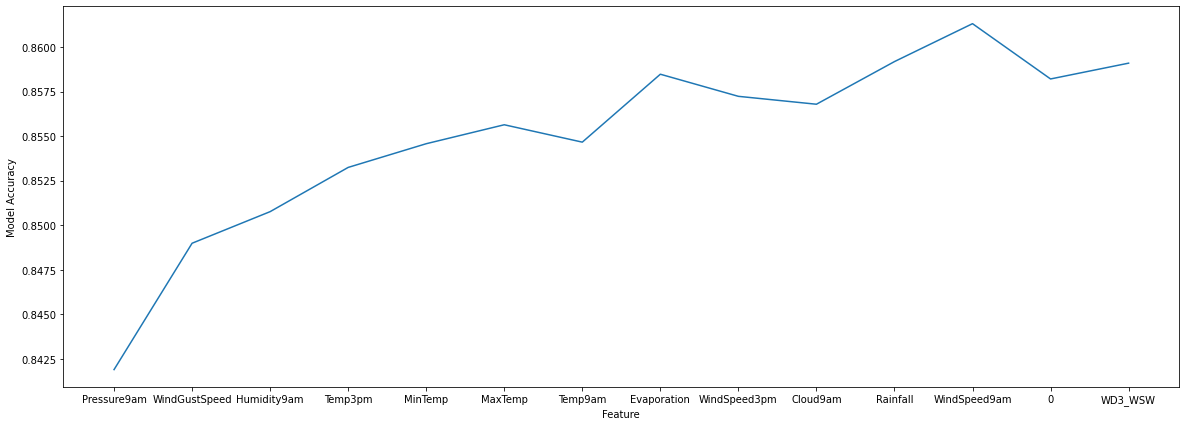

In [397]:
plt.figure(figsize=(20,7))
plt.plot([
'Pressure9am',
'WindGustSpeed',
 'Humidity9am',
 'Temp3pm',
 'MinTemp',
 'MaxTemp',
 'Temp9am',
 'Evaporation',
 'WindSpeed3pm',
 'Cloud9am',
 'Rainfall',
 'WindSpeed9am',
 0,'WD3_WSW'],list_fs)
plt.xlabel("Feature")
plt.ylabel("Model Accuracy")

### Accuracy using the first 16 most important features to run random forest

In [399]:
df_after_fs1=df_new.filter(x_ax[0:16])
df_after_fs1["RainTomorrow"]=df_new["RainTomorrow"]
df_after_fs1
from sklearn.model_selection import train_test_split, GridSearchCV
train_set1, test_set1 = train_test_split(df_after_fs1, test_size=0.2,random_state=30)
x_Train1=train_set1.drop(['RainTomorrow'],axis=1)
y_Train1=train_set1.RainTomorrow
x_Test1=test_set1.drop(['RainTomorrow'],axis=1)
y_Test1=test_set1.RainTomorrow
rf1=RandomForestClassifier(n_estimators=100)
rf1.fit(x_Train1,y_Train1)
    
rf_pred1=rf1.predict(x_Test1)
rf_acc1 = accuracy_score(y_Test1, rf_pred1)
list_fs.append(rf_acc1)
print("Accuracy:",rf_acc1) 

rf_cm = confusion_matrix(y_Test, rf_pred)


Accuracy: 0.8582949308755761


### Confusion Matrix

Confusion Matrix: 


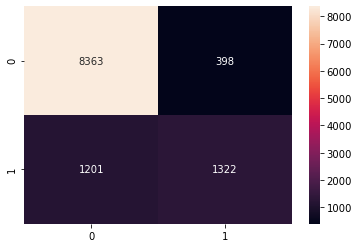

In [419]:
rf_cm = confusion_matrix(y_Test1, rf_pred1)
print("Confusion Matrix: ")
sns.heatmap(rf_cm, annot = True, fmt='d')




### ROC CURVE

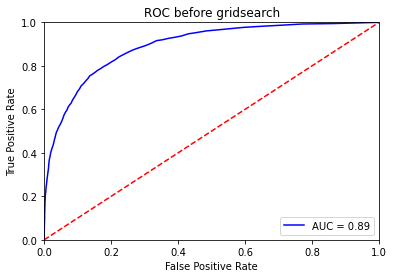

In [420]:
import sklearn.metrics as metrics

probs = rf1.predict_proba(x_Test1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_Test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC before gridsearch')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Grid Search

In [ ]:
#the best hyperharapeters by running gridsearch is 
#(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200)
#It took more than 10 hour to run and the result from last run was not saved so I just place it here.
rf = RandomForestClassifier(random_state=30)
parameters = {'bootstrap': [True, False],
              'min_samples_split':[2, 3, 4,5,6,7],
              'criterion':['entropy', 'gini'],
              'n_estimators':[100, 200,300,400,500,600]
             }
grid_search= GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=10, n_jobs=-1)
grid_search= grid_search.fit(x_Train, y_Train.values.ravel())

In [428]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split= 4, n_estimators= 200, random_state=30)
rf.fit(x_Train, y_Train.values.ravel())
ypred = rf.predict(x_Test)
accuracy = accuracy_score(ypred, y_Test)
print(accuracy)

0.8639666784828075


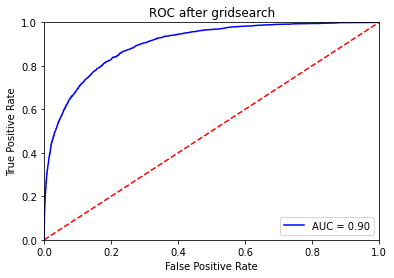

In [432]:
probs = rf.predict_proba(x_Test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_Test, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC after gridsearch')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

Confusion Matrix: 


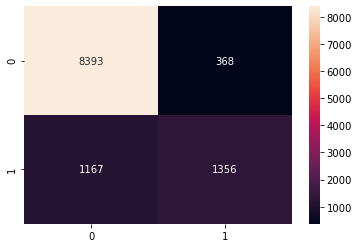

In [431]:
rf_cm1 = confusion_matrix(y_Test, ypred)
print("Confusion Matrix: ")
sns.heatmap(rf_cm1, annot = True, fmt='d')